In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
import librosa
import IPython.display as ipd

In [57]:
#load .wav sound file
#sr = sample rate = #sam[le per second, 22050 Hz
x, sr = librosa.load('violin-C4.wav')
x = x[0:(3*sr)+1]
print(type(x))
print('x length: {}'.format(len(x)))
print(type(sr))
print('sr = {}'.format(sr))

<class 'numpy.ndarray'>
x length: 66151
<class 'int'>
sr = 22050


In [58]:
# confirm the audio sample length
print('Sound clip is {} seconds long.'.format((len(x)-1)/sr))

Sound clip is 3.0 seconds long.


Text(0, 0.5, 'Pressure')

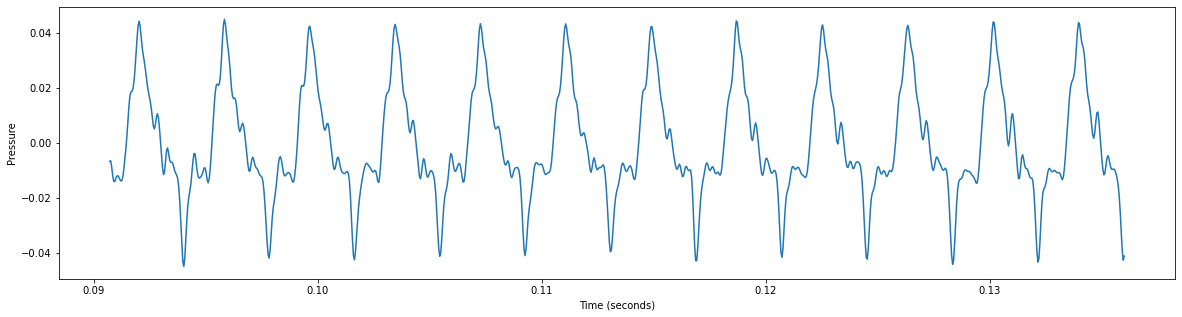

In [59]:
plt.figure(figsize=(20,5))
# Develop array 't to match x
t = np.array(range(0, len(x)))/sr
#plt.plot(t,x)
plt.plot(t[2000:3000],x[2000:3000])
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure')

In [60]:
ipd.Audio(x ,rate = sr)

In [61]:
c = np.fft.fft(x)
print(type(c))
print(len(c))
#print the array of complex numbers
print(c[0:10])

<class 'numpy.ndarray'>
66151
[-105.52198595-3.10862447e-15j    4.50358546-4.71183184e+00j
    2.83387104-3.87256720e+00j    1.89096091-4.07505836e+00j
    0.64015351-4.07604171e+00j   -0.29418841-3.45535666e+00j
   -0.84512789-2.92568689e+00j   -1.07781596-2.38081172e+00j
   -1.21083966-1.95421703e+00j   -1.26617415-1.64000292e+00j]


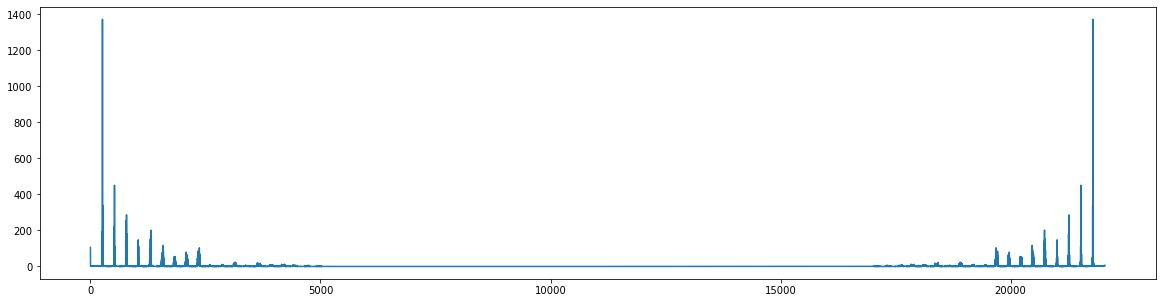

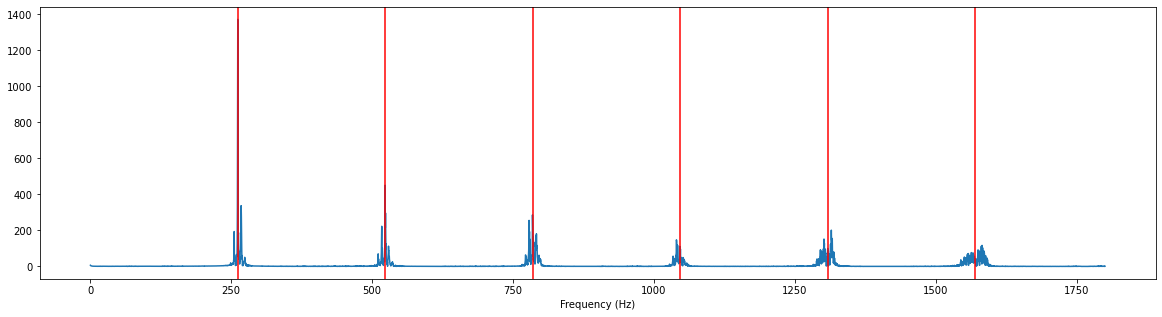

In [90]:
fr = np.array(range(0,66151))/3
# plot the absolute value
plt.figure(figsize=(20,5))
plt.plot(fr,np.abs(c))

plt.figure(figsize=(20,5))
condition = (fr >0) & (fr < 1800)
plt.plot(fr[condition],np.abs(c[condition]))
plt.xlabel('Frequency (Hz)')
plt.axvline(x = 261.65, color ='red')
plt.axvline(x = 261.65*2, color ='red')
plt.axvline(x = 261.65*3, color ='red')
plt.axvline(x = 261.65*4, color ='red')
plt.axvline(x = 261.65*5, color ='red')
plt.axvline(x = 261.65*6, color ='red')

In [ ]:
print(len(c))

66151
